In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('test.csv')

Dropping First column, land area ones since they came as blank

In [3]:
df.drop(columns = ['Unnamed: 0'],inplace=True)

In [4]:
df.head()

,city,state,political affiliation,population,people under age 5,people under age 18,people 65 and older,female,white,black,...,people in poverty,businesses,men owned businesses,female owned businesses,minority owned businesses,nonminority owned businesses,veteran owned businesses,nonveteran owned businesses,population per square mile,land area in square miles
0,Birmingham,Alabama,liberal,209880,6.5,20.3,14.2,53.1,25.3,70.5,...,27.2,20738,10318,8286,10605,8770,2082,17113,1453.0,146.07
1,Montgomery,Alabama,liberal,198218,6.8,24.0,13.7,53.0,33.3,60.6,...,21.9,18043,8879,7459,8793,8363,2352,14434,1289.5,159.57
2,Mobile,Alabama,liberal,189572,6.3,21.7,16.0,52.6,44.8,50.6,...,22.0,20118,9703,8644,8808,10250,2275,16639,1402.6,139.11
3,Huntsville,Alabama,liberal,197318,6.4,21.1,15.7,51.9,61.6,30.6,...,17.7,16838,8211,6565,4380,11515,1816,13915,861.5,209.05
4,Tuscaloosa,Alabama,liberal,101113,5.9,18.8,11.7,52.4,51.1,44.1,...,24.2,6802,3374,2530,1953,4375,670,5438,1501.9,60.23


In [5]:
df.shape

(10, 47)

In [6]:
df.columns

Index(['city', 'state', 'political affiliation', 'population',
       'people under age 5', 'people under age 18', 'people 65 and older',
       'female', 'white', 'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'veteran', 'foreign born', 'owner occupied houses',
       'avg value of owner occupied houses', 'avg rent', 'households',
       'people per household', 'living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelor's degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+',
       'healthcare and social assistance revenue ($1,000)',
       'manufacturers shipments ($1,000)',
       'avg travel time to work (min), 16+', 'avg household in

We dont need city or state anymore as they are just identifiers and potentially overpower local politics too much

In [7]:
df.drop(columns = ['city','state'],inplace=True)





Checking for class imbalance

In [8]:
df['political affiliation'].value_counts()

liberal         7
conservative    3
Name: political affiliation, dtype: int64

Checking for null values

In [9]:
df.isnull().sum()

political affiliation                                0
population                                           0
people under age 5                                   0
people under age 18                                  0
people 65 and older                                  0
female                                               0
white                                                0
black                                                0
american indian or alaska native                     0
asian                                                0
native hawaiian and other pacific islander           0
2+ races                                             0
hispanic                                             0
veteran                                              0
foreign born                                         0
owner occupied houses                                0
avg value of owner occupied houses                   0
avg rent                                             0
households

In [10]:
df.head()


,political affiliation,population,people under age 5,people under age 18,people 65 and older,female,white,black,american indian or alaska native,asian,...,people in poverty,businesses,men owned businesses,female owned businesses,minority owned businesses,nonminority owned businesses,veteran owned businesses,nonveteran owned businesses,population per square mile,land area in square miles
0,liberal,209880,6.5,20.3,14.2,53.1,25.3,70.5,0.2,0.9,...,27.2,20738,10318,8286,10605,8770,2082,17113,1453.0,146.07
1,liberal,198218,6.8,24.0,13.7,53.0,33.3,60.6,0.2,2.8,...,21.9,18043,8879,7459,8793,8363,2352,14434,1289.5,159.57
2,liberal,189572,6.3,21.7,16.0,52.6,44.8,50.6,0.2,1.8,...,22.0,20118,9703,8644,8808,10250,2275,16639,1402.6,139.11
3,liberal,197318,6.4,21.1,15.7,51.9,61.6,30.6,0.4,2.7,...,17.7,16838,8211,6565,4380,11515,1816,13915,861.5,209.05
4,liberal,101113,5.9,18.8,11.7,52.4,51.1,44.1,0.3,2.4,...,24.2,6802,3374,2530,1953,4375,670,5438,1501.9,60.23


Currently all of our data types are continuous, many of these we will
later bucket and categorize but first we'll take a look at the distributions


In [11]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 45 columns):
political affiliation                                10 non-null object
population                                           10 non-null int64
people under age 5                                   10 non-null float64
people under age 18                                  10 non-null float64
people 65 and older                                  10 non-null float64
female                                               10 non-null float64
white                                                10 non-null float64
black                                                10 non-null float64
american indian or alaska native                     10 non-null float64
asian                                                10 non-null float64
native hawaiian and other pacific islander           10 non-null float64
2+ races                                             10 non-null float64
hispanic                 

## Outliers
Currently all of our features are continuous. We'll start looking at these in detail

In [12]:
df.rename(columns={"bachelor's degree or higher, 25+": 'bachelors degree or higher, 25+'},inplace=True)

In [13]:
continuous = ['population',
       'people under age 5', 'people under age 18', 'people 65 and older',
       'female', 'white', 'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'veteran', 'foreign born', 'owner occupied houses',
       'avg value of owner occupied houses', 'avg rent', 'households',
       'people per household', 'living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelors degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+',
       'healthcare and social assistance revenue ($1,000)',
       'manufacturers shipments ($1,000)',
       'avg travel time to work (min), 16+', 'avg household income',
       'per capita income in last 12 months', 'people in poverty',
       'businesses', 'men owned businesses', 'female owned businesses',
       'minority owned businesses', 'nonminority owned businesses',
       'veteran owned businesses', 'nonveteran owned businesses',
       'population per square mile','land area in square miles']
for column in continuous:
    print(df[column].describe())
    print('\n')

count        10.000000
mean     121989.800000
std       67767.524649
min       50440.000000
25%       66365.250000
50%       93110.500000
75%      195381.500000
max      209880.000000
Name: population, dtype: float64


count    10.000000
mean      6.160000
std       0.671979
min       4.900000
25%       6.000000
50%       6.350000
75%       6.500000
max       6.900000
Name: people under age 5, dtype: float64


count    10.000000
mean     22.070000
std       2.421226
min      18.300000
25%      20.500000
50%      22.400000
75%      23.900000
max      25.400000
Name: people under age 18, dtype: float64


count    10.000000
mean     14.010000
std       3.209171
min       7.500000
25%      12.200000
50%      14.900000
75%      15.925000
max      17.800000
Name: people 65 and older, dtype: float64


count    10.00000
mean     52.20000
std       1.00995
min      50.20000
25%      52.02500
50%      52.60000
75%      52.80000
max      53.10000
Name: female, dtype: float64


count    10.000000


The percentages are in whole numbers so we're going to turn them into
percentages by dividing by 100

In [14]:
percentages = ['people under age 5', 'people under age 18', 'people 65 and older',
       'female', 'white', 'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'foreign born', 'owner occupied houses','living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelors degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+', 'people in poverty']
for column in percentages:
    df[column]=df[column]/100
    print(df[column].describe())
    print('\n')

count    10.00000
mean      0.06160
std       0.00672
min       0.04900
25%       0.06000
50%       0.06350
75%       0.06500
max       0.06900
Name: people under age 5, dtype: float64


count    10.000000
mean      0.220700
std       0.024212
min       0.183000
25%       0.205000
50%       0.224000
75%       0.239000
max       0.254000
Name: people under age 18, dtype: float64


count    10.000000
mean      0.140100
std       0.032092
min       0.075000
25%       0.122000
50%       0.149000
75%       0.159250
max       0.178000
Name: people 65 and older, dtype: float64


count    10.00000
mean      0.52200
std       0.01010
min       0.50200
25%       0.52025
50%       0.52600
75%       0.52800
max       0.53100
Name: female, dtype: float64


count    10.000000
mean      0.566000
std       0.173511
min       0.253000
25%       0.463750
50%       0.619000
75%       0.715250
max       0.741000
Name: white, dtype: float64


count    10.000000
mean      0.362500
std       0.195265
min    

Turning veteran into % of population 

In [15]:
df['veteran'] = (df['veteran']/df['population'])*100

With Outliers:


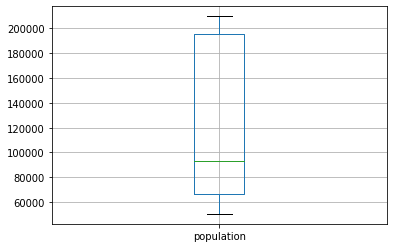

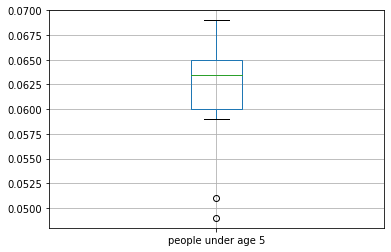

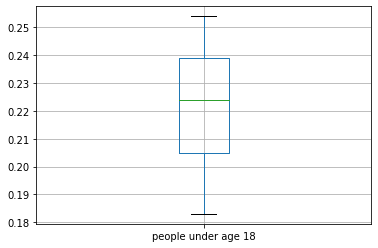

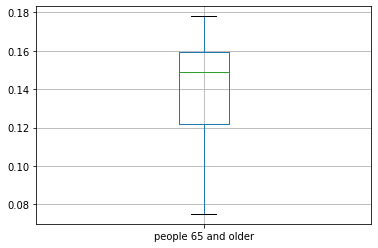

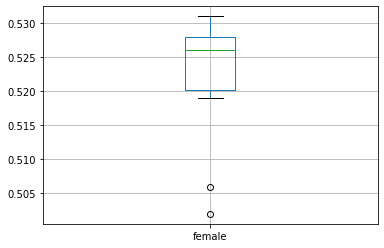

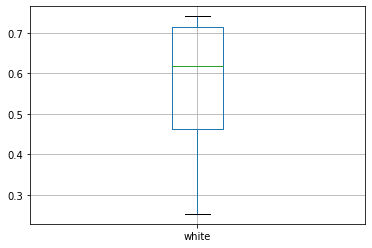

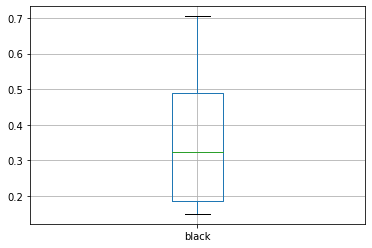

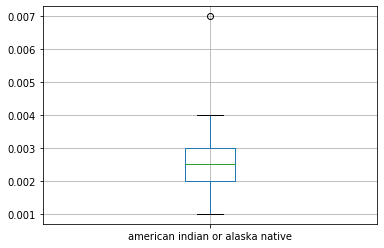

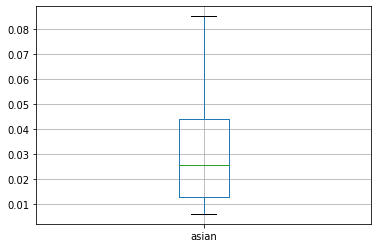

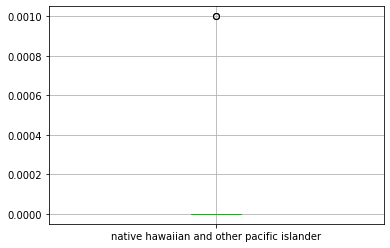

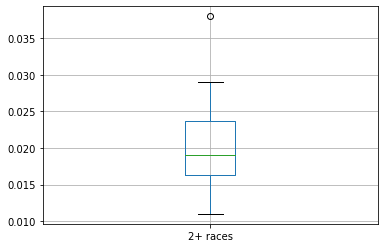

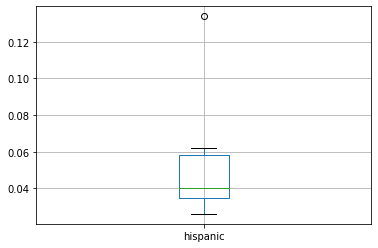

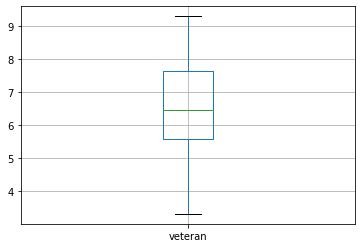

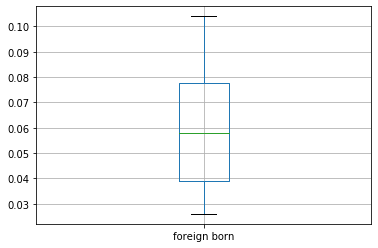

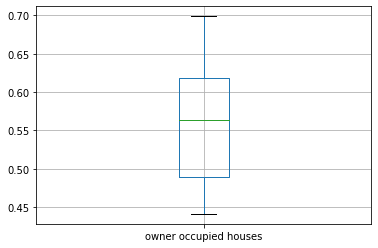

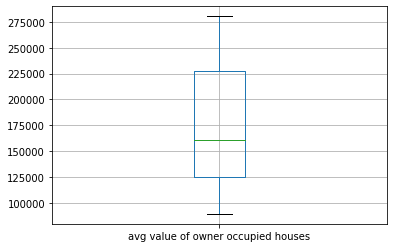

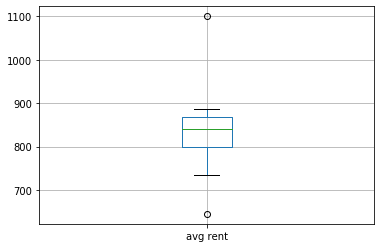

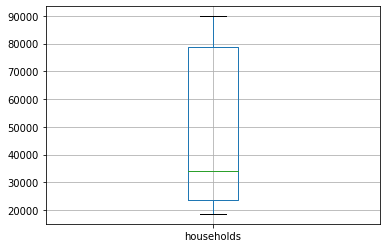

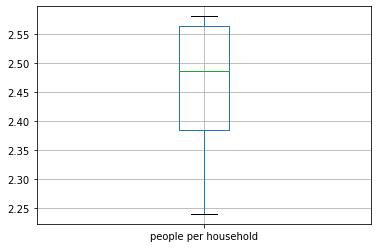

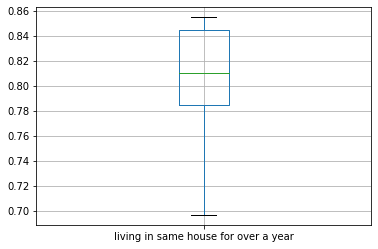

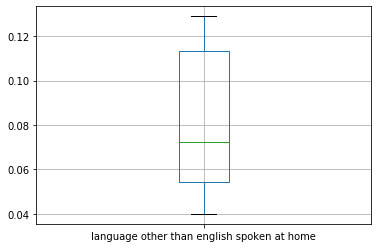

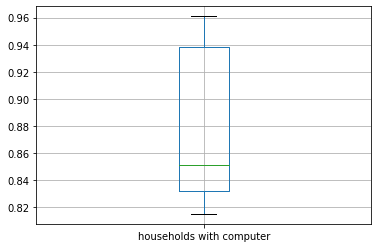

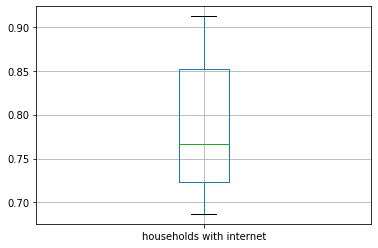

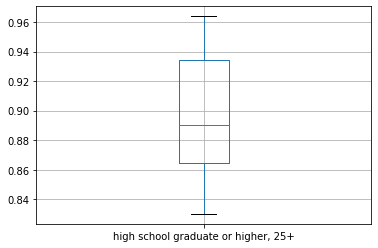

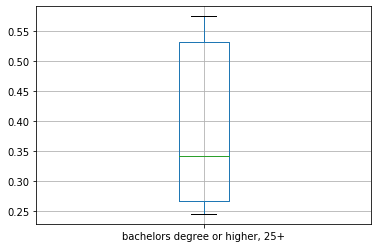

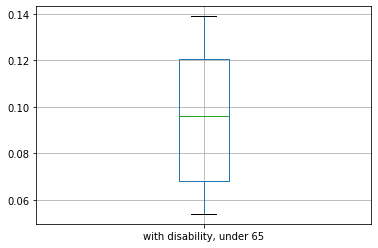

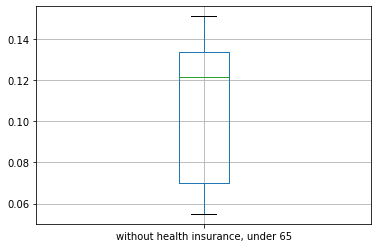

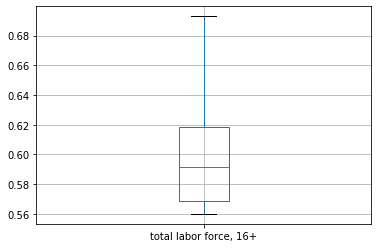

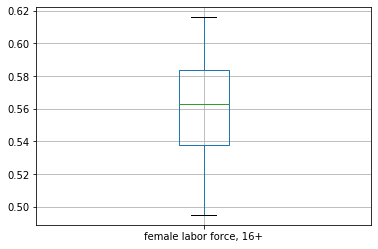

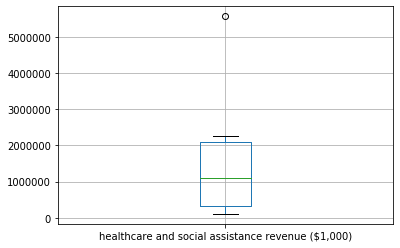

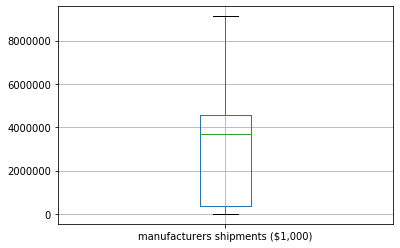

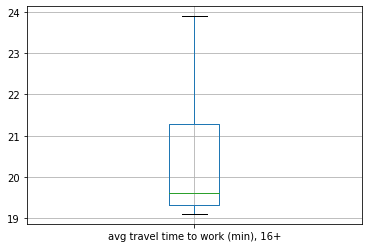

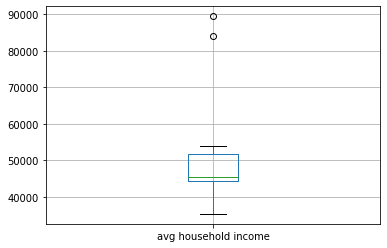

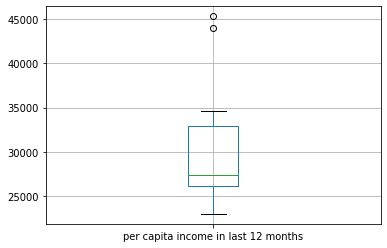

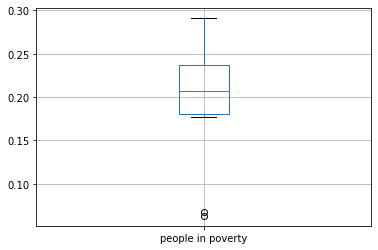

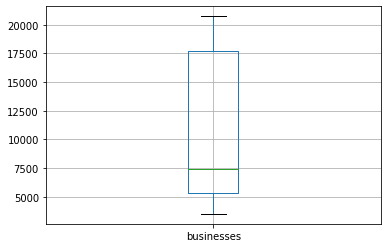

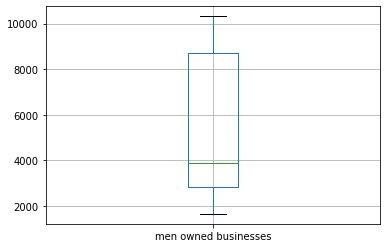

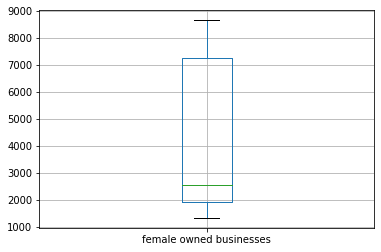

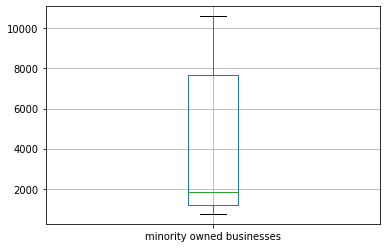

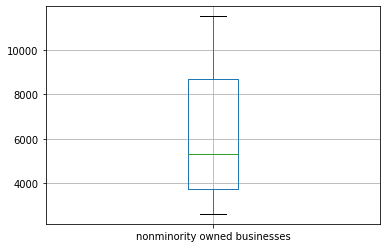

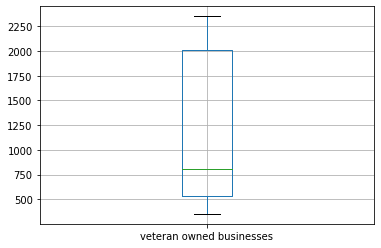

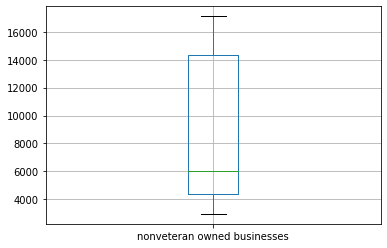

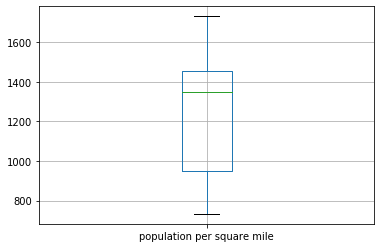

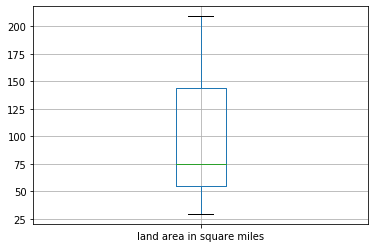

In [16]:
print("With Outliers:")
for column in continuous:
    df.boxplot(column=column)
    plt.show()

In [17]:

def remove_outliers(continous_columns, dataframe):
    """Return a dataframe with any values below the lower fence and above the upper fence removed from given columns in the given dataframe."""
    for column in continous_columns:
        # calculate values for lower fence and upper fence
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        # remove rows from dataframe which fall out of this range
        num_removing = dataframe.shape[0]
        new_df = dataframe[dataframe[column] > lower_fence]
        new_df = dataframe[dataframe[column] < upper_fence]
        num_removing -= new_df.shape[0]
        print(f"{num_removing} rows will be removed from {column}.")
    return new_df

In [18]:
remove_outliers(continuous, df)

0 rows will be removed from population.
0 rows will be removed from people under age 5.
0 rows will be removed from people under age 18.
0 rows will be removed from people 65 and older.
0 rows will be removed from female.
0 rows will be removed from white.
0 rows will be removed from black.
1 rows will be removed from american indian or alaska native.
0 rows will be removed from asian.
10 rows will be removed from native hawaiian and other pacific islander.
1 rows will be removed from 2+ races.
1 rows will be removed from hispanic.
0 rows will be removed from veteran.
0 rows will be removed from foreign born.
0 rows will be removed from owner occupied houses.
0 rows will be removed from avg value of owner occupied houses.
1 rows will be removed from avg rent.
0 rows will be removed from households.
0 rows will be removed from people per household.
0 rows will be removed from living in same house for over a year.
0 rows will be removed from language other than english spoken at home.
0 

,political affiliation,population,people under age 5,people under age 18,people 65 and older,female,white,black,american indian or alaska native,asian,...,people in poverty,businesses,men owned businesses,female owned businesses,minority owned businesses,nonminority owned businesses,veteran owned businesses,nonveteran owned businesses,population per square mile,land area in square miles
0,liberal,209880,0.065,0.203,0.142,0.531,0.253,0.705,0.002,0.009,...,0.272,20738,10318,8286,10605,8770,2082,17113,1453.0,146.07
1,liberal,198218,0.068,0.240,0.137,0.530,0.333,0.606,0.002,0.028,...,0.219,18043,8879,7459,8793,8363,2352,14434,1289.5,159.57
2,liberal,189572,0.063,0.217,0.160,0.526,0.448,0.506,0.002,0.018,...,0.220,20118,9703,8644,8808,10250,2275,16639,1402.6,139.11
3,liberal,197318,0.064,0.211,0.157,0.519,0.616,0.306,0.004,0.027,...,0.177,16838,8211,6565,4380,11515,1816,13915,861.5,209.05
4,liberal,101113,0.059,0.188,0.117,0.524,0.511,0.441,0.003,0.024,...,0.242,6802,3374,2530,1953,4375,670,5438,1501.9,60.23
5,liberal,85108,0.069,0.254,0.156,0.528,0.727,0.174,0.002,0.049,...,0.067,7982,4402,2471,1371,6147,831,6551,1730.6,47.16
6,conservative,68247,0.065,0.236,0.172,0.528,0.622,0.340,0.003,0.011,...,0.191,6620,3163,2552,1707,4478,785,5294,732.6,89.40
7,liberal,65738,0.051,0.183,0.075,0.506,0.729,0.170,0.001,0.085,...,0.291,4659,2756,1332,934,3503,359,3999,919.3,58.07
8,conservative,54264,0.063,0.231,0.178,0.526,0.680,0.227,0.003,0.006,...,0.196,4949,2598,1758,1142,3481,484,4045,1037.4,53.67
9,conservative,50440,0.049,0.244,0.107,0.502,0.741,0.150,0.007,0.055,...,0.063,3511,1658,1399,743,2617,352,2954,1450.9,29.59
